In [29]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [30]:
nx, ny = 100,100
xstart, xend = -1.0, 1.0
ystart, yend = -1.5, 1.5
x = numpy.linspace(xstart, xend, num=nx)
y = numpy.linspace(ystart, yend, num=ny)
X,Y = numpy.meshgrid(x,y)

print(X.shape)
print(type(X))
print(X.dtype)

(100, 100)
<class 'numpy.ndarray'>
float64


In [50]:
# create the freestream
u_inf = 1.0
u_free = numpy.ones_like(X)*u_inf
v_free = numpy.zeros_like(X)
psi_free =  u_inf*Y

# create the source
class Source:
    def __init__(self, sigma, x, y):
        self.sigma = sigma
        self.x = x
        self.y = y
        
    def velocity (self, X, Y):
        r2 = (X-self.x)**2 + (Y-self.y)**2
        u = self.sigma/(2*math.pi)*(X-self.x)/r2
        v = self.sigma/(2*math.pi)*(Y-self.y)/r2
        return u,v
    
    def streamfun (self, X, Y):
        psi=self.sigma/(2*math.pi)*numpy.arctan((Y-self.y)/(X-self.x))
        return psi

In [51]:
s1=Source(1.0,x[-1],y[-1])
print(s1.sigma)
print(type(s1))

1.0
<class '__main__.Source'>


In [81]:
N=21
total_sigma = 5.0
sigma = total_sigma/N
x_sources = numpy.zeros(N) #here it's on the origin line of x = 0
y_sources = numpy.linspace(-1.0, 1.0, num=N)

# test to see what the undeclared type will be
# create a 1d array where each element is an instance of the source
# an object is an instance of a source
sources = numpy.empty(N)
print(type(sources))
print(sources.dtype)
print('\n')

# create a 1d array where each element is an instance of the source
# an object is an instance of a source
sources = numpy.empty(N, dtype=object)
print(type(sources))
print(sources.dtype)

for i in range (0,N):
    sources[i] = Source(sigma, x_sources[i], y_sources[i])
    
u=u_free.copy()
v=v_free.copy()
psi=psi_free.copy()
for source in sources:
    u_s, v_s = source.velocity(X,Y)
    psi_s = source.streamfun(X,Y)
    u=u+u_s
    v=v+v_s
    psi = psi+psi_s

<class 'numpy.ndarray'>
float64


<class 'numpy.ndarray'>
object


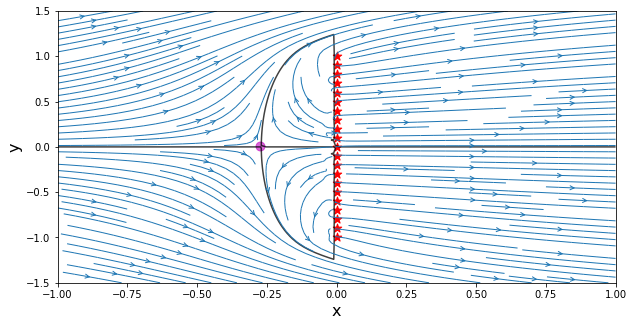

In [82]:
# plot the streamlines
width = 10
height = 5
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(x_sources, y_sources, color = 'r', marker = '*', s=80);
pyplot.contour(X,Y,psi, levels = [0.0], colors = 'black', alpha = 0.75)
pyplot.streamplot(X,Y,u,v, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->');

# find the stagnation points
magn = numpy.sqrt(u**2+v**2)
# argmin flattens a 2d array and returns the index of the 1d array so we need to use unravel to fix this
j, i = numpy.unravel_index(magn.argmin(), magn.shape)
pyplot.scatter(x[i],y[j], color = 'm', s=80, marker = 'o', alpha = 0.6);

In [88]:
from scipy import integrate

# integration
# use the lambda method
test = integrate.quad(lambda x: x**2, 0.0, 1.0)
print('answer'+'\t'+'\t'+'\t' +'error')
print(test)

# here args is giving the value to a1 and a2
integrate.quad(lambda x, a1, a2: a1 * a2*x**2, 0.0, 1.0, args=(2.0, 3.0))

answer			error
(0.33333333333333337, 3.700743415417189e-15)


(2.0, 2.220446049250313e-14)

In [95]:
sigma = 2.5
ymin, ymax = -1.0, 1.0

integrand_u = lambda s, x, y: x / (x**2+(y-s)**2)
integrand_v = lambda s, x, y: (y-s) / (x**2+(y-s)**2)
print(type(integrand_u))

def integration(x, y, integrand): 
    return integrate.quad(integrand, ymin, ymax, args = (x,y))[0] # we only want the first element

vec_integration=numpy.vectorize(integration)

u_sheet = sigma / (2*math.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2*math.pi) * vec_integration(X, Y, integrand_v)

un=u_free+u_sheet
vn=v_free+v_sheet

<class 'function'>


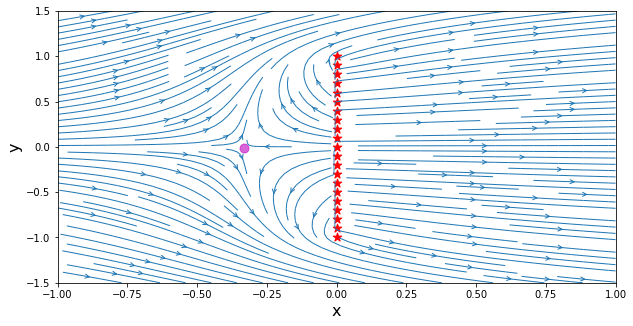

In [96]:
# plot the streamlines
width = 10
height = 5
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(x_sources, y_sources, color = 'r', marker = '*', s=80);
pyplot.streamplot(X,Y,un,vn, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->');

# find the stagnation points
magn = numpy.sqrt(u**2+v**2)
# argmin flattens a 2d array and returns the index of the 1d array so we need to use unravel to fix this
j, i = numpy.unravel_index(magn.argmin(), magn.shape)
pyplot.scatter(x[i],y[j], color = 'm', s=80, marker = 'o', alpha = 0.6);